                          Лабораторная работа №1 (расчётная часть)
                                Студента уч. группы R3336
                                      Прокофьева Ильи
                                        Вариант №19

Выборка A.


          




In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Выше импортировали библиотеки, которые нам понадобятся

In [40]:
data = np.array([
    2, 2, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 4, 1, 0, 0,
    0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
    0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0,
    0, 0, 0, 2, 1, 1, 1, 1, 3, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0
])

print(f"Выборка A (всего {len(data)} элементов):")
print(data)


Выборка A (всего 80 элементов):
[2 2 0 1 3 0 0 0 0 0 1 0 1 0 0 1 4 1 0 0 0 2 0 1 1 0 1 2 1 2 0 0 0 1 1 0 1
 0 1 1 0 1 0 0 2 1 0 0 1 1 1 0 0 2 0 0 1 1 0 0 0 0 0 2 1 1 1 1 3 0 0 1 1 0
 1 0 1 1 1 0]


In [41]:
#A1
# Найдём максимальное и минимальное значения выборки
max_value = np.max(data)
min_value = np.min(data)

# Найдём размах выборки
range_value = max_value - min_value

print("Максимальный элемент: " + str(max_value))
print("Минимальный элемент: " + str(min_value))
print("Размах выборки: " + str(range_value))


Максимальный элемент: 4
Минимальный элемент: 0
Размах выборки: 4


In [42]:
# Наедем статистический ряд
unique_values = []
frequency = []

for num in data:
    if num not in unique_values:
        unique_values.append(num)
        frequency.append(1)
    else:
        index = unique_values.index(num)
        frequency[index] += 1

# Отсортируем
sorted_indices = np.argsort(unique_values)
sorted_unique = [unique_values[i] for i in sorted_indices]
sorted_freq = [frequency[i] for i in sorted_indices]

# Вывод частотного ряда
print("Частотный ряд:")
print("Значение | Частота")
for val, freq in zip(sorted_unique, sorted_freq):
    print(f"    {val}    |    {freq}")



Частотный ряд:
Значение | Частота
    0    |    38
    1    |    31
    2    |    8
    3    |    2
    4    |    1


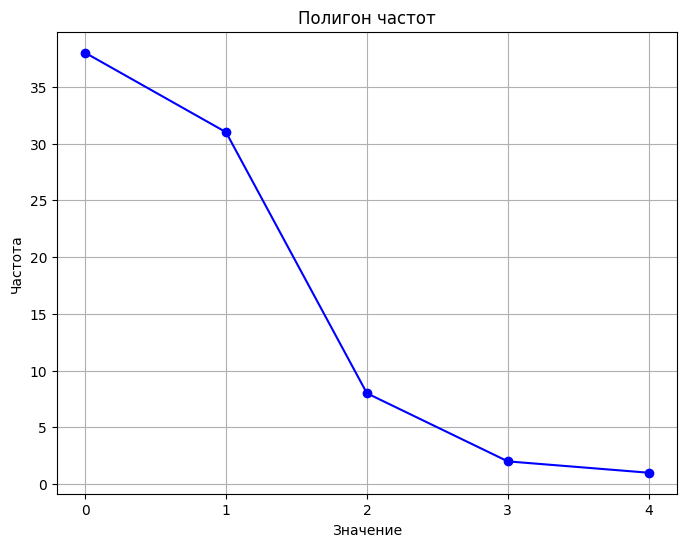

In [43]:
# Строим полигон частот
plt.figure(figsize=(8,6))
plt.plot(sorted_unique, sorted_freq, marker='o', linestyle='-', color='blue')
plt.title('Полигон частот')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(sorted_unique)
plt.grid(True)
plt.show()


In [44]:
# Отсортируем массив данных (т.е. список) в порядке возрастания
sorted_data = np.sort(data)

# Определяем эмпирическую функцию распределения
n = len(data)

efr = []
for i in range(n):
    efr.append((i+1)/n)

print("Первые 10 значений ЭФР:")
print("Значение | ЭФР")
for val, f in zip(sorted_data[:10], efr[:10]):
    print(f"    {val}    |  {f:.2f}")


Первые 10 значений ЭФР:
Значение | ЭФР
    0    |  0.01
    0    |  0.03
    0    |  0.04
    0    |  0.05
    0    |  0.06
    0    |  0.07
    0    |  0.09
    0    |  0.10
    0    |  0.11
    0    |  0.12


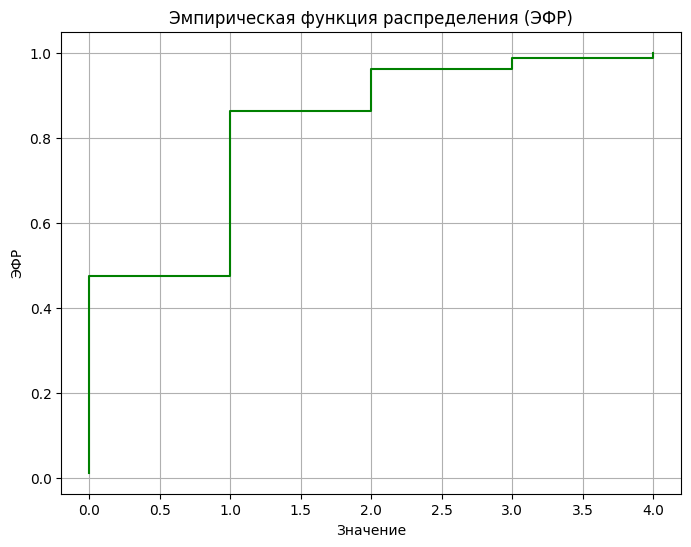

In [45]:
# Построеним график ЭФР
plt.figure(figsize=(8,6))
plt.step(sorted_data, efr, where='post', color='green')
plt.title('Эмпирическая функция распределения (ЭФР)')
plt.xlabel('Значение')
plt.ylabel('ЭФР')
plt.grid(True)
plt.show()


In [46]:
mean_value = np.mean(data)
print(f"Выборочное среднее (x^-): {mean_value}")


Выборочное среднее (x^-): 0.7125


In [47]:
# Вычисление начальных моментов до 4-го порядка
m1 = sum(data) / n  # Первый момент (он же мат. ожидание)
m2 = sum([x**2 for x in data]) / n
m3 = sum([x**3 for x in data]) / n
m4 = sum([x**4 for x in data]) / n
print(f"Начальные моменты:")
print(f"m1 (Первый момент): {m1}")
print(f"m2 (Второй момент): {m2}")
print(f"m3 (Третий момент): {m3}")
print(f"m4 (Четвёртый момент): {m4}")



Начальные моменты:
m1 (Первый момент): 0.7125
m2 (Второй момент): 1.2125
m3 (Третий момент): 2.6625
m4 (Четвёртый момент): 7.2125


In [48]:
central_m2 = sum([(x - m1)**2 for x in data]) / n  # Дисперсия
central_m3 = sum([(x - m1)**3 for x in data]) / n
central_m4 = sum([(x - m1)**4 for x in data]) / n

print(f"\nЦентральные моменты:")
print(f"m'_2 (Второй центральный момент - Дисперсия): {central_m2}")
print(f"m'_3 (Третий центральный момент): {central_m3}")
print(f"m'_4 (Четвёртый центральный момент): {central_m4}")



Центральные моменты:
m'_2 (Второй центральный момент - Дисперсия): 0.7048437499999989
m'_3 (Третий центральный момент): 0.7941914062500013
m'_4 (Четвёртый центральный момент): 2.5444296142578176


In [49]:
# Мода
mode = sorted_unique[0]
max_freq = sorted_freq[0]
for val, freq in zip(sorted_unique, sorted_freq):
    if freq > max_freq:
        mode = val
        max_freq = freq
print(f"Мода: {mode}, частота: {max_freq}")

# Медиана
if n % 2 == 1:
    median = sorted_data[n//2]
else:
    median = (sorted_data[n//2 -1] + sorted_data[n//2]) / 2
print(f"Медиана: {median}")

# Коэффициент асимметрии
if central_m2 != 0:
    skewness = central_m3 / (central_m2 ** 1.5)
    print(f"Коэффициент асимметрии: {skewness}")

# Коэффициент эксцесса
if central_m2 != 0:
    kurtosis = (central_m4 / (central_m2 ** 2)) - 3
    print(f"Эксцесс: {kurtosis}")



Мода: 0, частота: 38
Медиана: 1.0
Коэффициент асимметрии: 1.3421031747504086
Эксцесс: 2.1215891339975093


Выводы:

Положительное значение коэффициента асимметрии (≈1.34) указывает на правую асимметрию распределения.

Положительное значение эксцесса (≈2.121) указывает на островершинное распределение.

Данные принимают целочисленные значения, что предполагает дискретное распределение. Положительная асимметрия может указывать на распределение Пуассона, где большинство значений сосредоточено около 0, а хвост тянется вправо.


В ходе лабораторной работы мы проанализировали заданную выборку, определив основные статистические характеристики:

Мода: 0

Медиана: 1.0

Коэффициент асимметрии: 1.34

Эксцесс: 2.12


Выборка B:

In [50]:
data_array = [144, 166, 120, 89, 103, 140, 143, 126, 119, 125, 161, 140,
              168, 133, 151, 132, 135, 166, 131, 120, 127, 105, 136, 145,
              154, 105, 173, 97, 113, 150, 143, 107, 133, 139, 127, 138,
              107, 107, 127, 127, 159, 170, 120, 120, 106, 126, 152, 128,
              160, 120, 109, 106, 134, 127, 107, 106, 95, 91, 113, 128,
              120, 99, 160, 137, 143, 103, 138, 143, 131, 157, 148, 146,
              112, 141, 174, 109, 173, 91, 148, 123, 133, 117, 122, 139,
              107, 139, 169, 125, 141, 132, 115, 157, 127, 158, 115, 161,
              165, 145, 168, 107, 105, 115, 113, 138, 113, 145, 104, 99,
              137, 144, 122, 93, 124, 120, 112, 159, 135, 145, 137, 115,
              98, 159, 158, 125, 125, 121, 145, 130, 168, 132, 118, 139,
              184, 153, 133, 122, 138, 117, 147, 115, 134, 102, 107, 85,
              159, 139, 156, 123, 138, 136, 112, 101, 114, 141, 164, 142,
              96, 137, 161, 153, 125, 147, 137, 129, 140, 171, 115, 155,
              126, 145, 109, 147, 112, 98, 144, 114, 109, 149, 114, 173,
              118, 138, 102, 168, 116, 125, 151, 86, 129, 166, 115, 106,
              120, 133, 159, 158, 156, 414, 109, 138, 108, 155, 129, 145,
              139, 161, 116, 110, 155, 122, 181, 151, 129, 128, 137, 104,
              107, 115, 131, 146, 119, 125, 164, 145]


In [52]:
max_value = max(data_array)
min_value = min(data_array)

razmah = max_value - min_value
print("Максимальное значение: " + str(max_value))
print("Минимальное значение: " + str(min_value))
print("Размах выборки: " + str(razmah))

Максимальное значение: 414
Минимальное значение: 85
Размах выборки: 329


In [53]:
n = len(data_array)
k_real = 1+(3.322*math.log10(n))
k = int(round(k_real))
print("Оптимальное количество интервалов: " + str(k))

h_real = razmah / k
h = int(-1 * h_real // 1 * -1)  #Округляем длину интервала до ближайшего целого числа вверх
print("Длина интервала группировки: " + str(h))

Оптимальное количество интервалов: 9
Длина интервала группировки: 37


Интервальный ряд:
85 - 122: 78
122 - 159: 115
159 - 196: 30
196 - 233: 0
233 - 270: 0
270 - 307: 0
307 - 344: 0
344 - 381: 0
381 - 418: 1


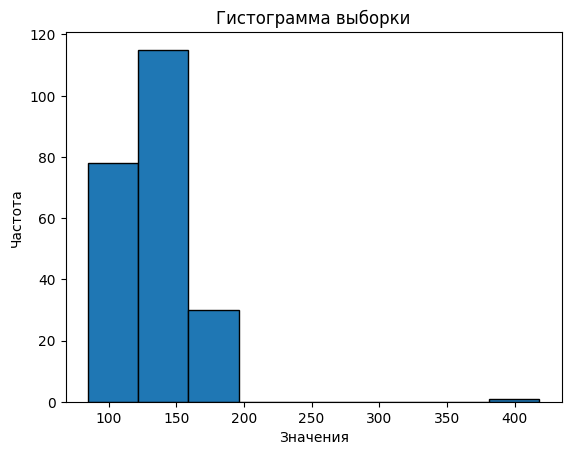

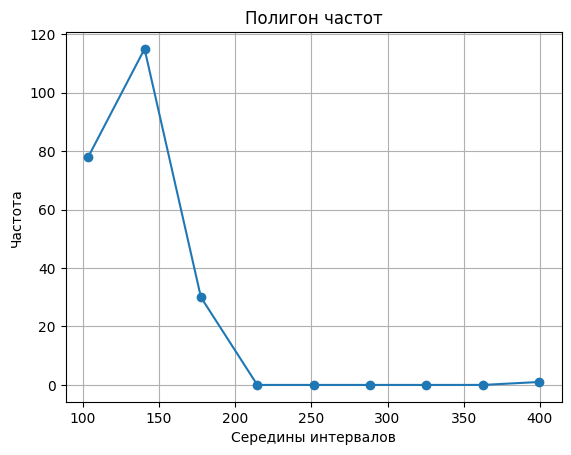

In [54]:
# Определим границы интервалов
intervals = []
lower_bound = min_value
for i in range(k):
    upper_bound = lower_bound + h
    intervals.append((lower_bound, upper_bound))
    lower_bound = upper_bound

# Посчитаем количество частот в каждом интервале
frequencies = [0] * k
for value in data_array:
    for i, interval in enumerate(intervals):
        if interval[0] <= value < interval[1]:
            frequencies[i] += 1
            break
        elif i == k - 1 and value == interval[1]:
            frequencies[i] += 1
            break

print("Интервальный ряд:")
for i, interval in enumerate(intervals):
    print(f"{interval[0]} - {interval[1]}: {frequencies[i]}")

#Построим гистограмму, для этого найдём середины интервала каждого интервала для полигона
interval_centers = [(interval[0] + interval[1]) / 2 for interval in intervals]

plt.bar([interval[0] for interval in intervals], frequencies, width=h, align='edge', edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма выборки')
plt.show()

# Построение полигона
plt.plot(interval_centers, frequencies, marker='o')
plt.xlabel('Середины интервалов')
plt.ylabel('Частота')
plt.title('Полигон частот')
plt.grid(True)
plt.show()


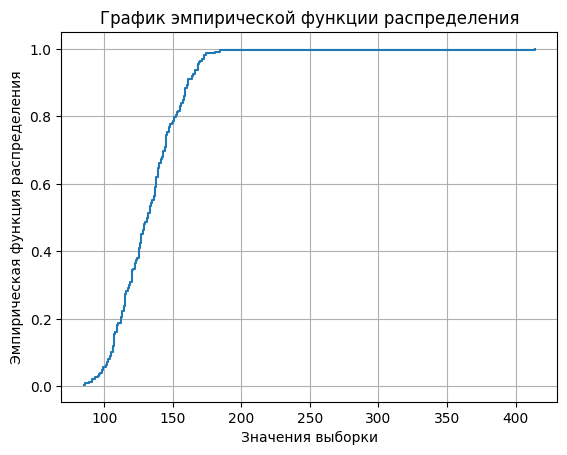

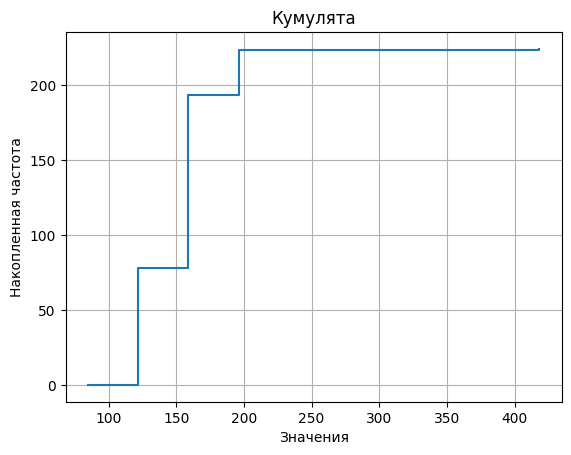

In [55]:
# Отсортируем выборку
sorted_data = sorted(data_array)

# Значения ЭФР
ecdf_values = []
for i in range(n):
    ecdf = (i + 1) / n
    ecdf_values.append(ecdf)

# Построение графика ЭФР
plt.step(sorted_data, ecdf_values, where='post')
plt.xlabel('Значения выборки')
plt.ylabel('Эмпирическая функция распределения')
plt.title('График эмпирической функции распределения')
plt.grid(True)
plt.show()

# Вычисление накопленных частот
cum_frequencies = []
cumulative = 0
for freq in frequencies:
    cumulative += freq
    cum_frequencies.append(cumulative)

# Построение кумуляты
interval_edges = [interval[0] for interval in intervals]
interval_edges.append(intervals[-1][1])  # Добавляем верхнюю границу последнего интервала

plt.step(interval_edges, [0] + cum_frequencies, where='post')
plt.xlabel('Значения')
plt.ylabel('Накопленная частота')
plt.title('Кумулята')
plt.grid(True)
plt.show()



In [56]:
# Начальный момент первого порядка (среднее)
def mean(data):
    sum_value = 0
    for value in data:
        sum_value += value
    return sum_value / len(data)

mean_value = mean(data_array)
print(f"Выборочное среднее: {mean_value}")


# Функция для вычисления начального момента k-го порядка
def initial_moment(data, k):
    sum_value = 0
    for value in data:
        sum_value += value ** k
    return sum_value / len(data)

# Вычисление начальных моментов
m1 = initial_moment(data_array, 1)
m2 = initial_moment(data_array, 2)
m3 = initial_moment(data_array, 3)
m4 = initial_moment(data_array, 4)

print(f"Начальные моменты:")
print(f"m1 = {m1}")
print(f"m2 = {m2}")
print(f"m3 = {m3}")
print(f"m4 = {m4}")


# Функция для вычисления центрального момента k-го порядка
def central_moment(data, mean_value, k):
    sum_value = 0
    for value in data:
        sum_value += (value - mean_value) ** k
    return sum_value / len(data)

# Вычисление центральных моментов
mu1 = central_moment(data_array, mean_value, 1)
mu2 = central_moment(data_array, mean_value, 2)
mu3 = central_moment(data_array, mean_value, 3)
mu4 = central_moment(data_array, mean_value, 4)

print(f"Центральные моменты:")
print(f"mu1 = {mu1}")
print(f"mu2 = {mu2}")
print(f"mu3 = {mu3}")
print(f"mu4 = {mu4}")

Выборочное среднее: 132.93303571428572
Начальные моменты:
m1 = 132.93303571428572
m2 = 18475.727678571428
m3 = 2768584.254464286
m4 = 478357333.94196427
Центральные моменты:
mu1 = -8.120488408686859e-15
mu2 = 804.5356943558672
mu3 = 98650.94273888055
mu4 = 28327802.34283749


Мода выборки: 120, частота: 8


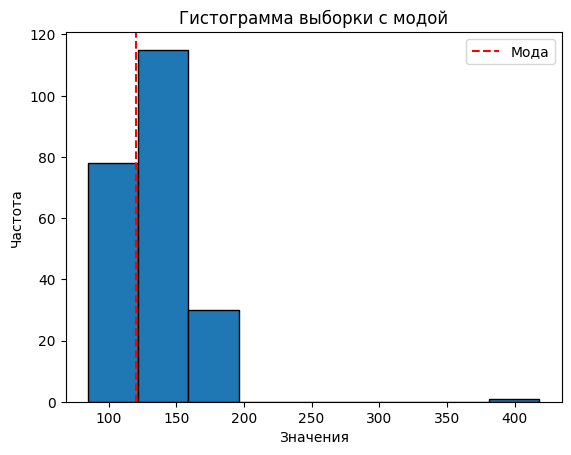

In [57]:
# Подсчет частоты каждого значения
frequency_dict = {}
for value in data_array:
    if value in frequency_dict:
        frequency_dict[value] += 1
    else:
        frequency_dict[value] = 1

# Нахождение значения с максимальной частотой
max_freq = 0
mode = None
for key, freq in frequency_dict.items():
    if freq > max_freq:
        max_freq = freq
        mode = key

print(f"Мода выборки: {mode}, частота: {max_freq}")


# Построение гистограммы с отмеченной модой
plt.bar([interval[0] for interval in intervals], frequencies, width=h, align='edge', edgecolor='black')
plt.axvline(mode, color='red', linestyle='--', label='Мода')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма выборки с модой')
plt.legend()
plt.show()


Медиана выборки: 131.5


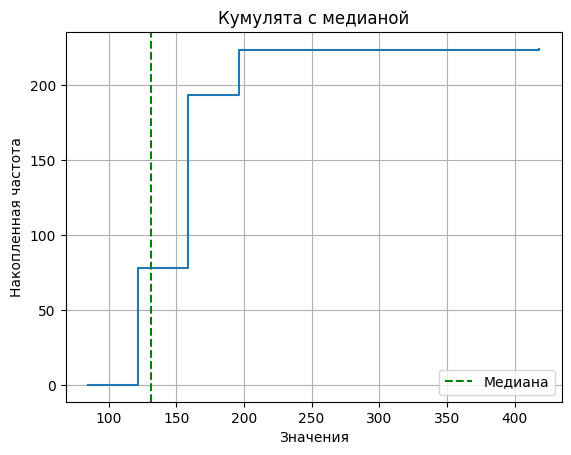

Коэффициент асимметрии (y1): 4.322980379626666
Коэффициент эксцесса (y2): 40.764528061561016


In [60]:
# Находим медииану
def median(data):
    n = len(data)
    if n % 2 == 1:
        return data[n // 2]
    else:
        middle1 = data[n // 2 - 1]
        middle2 = data[n // 2]
        return (middle1 + middle2) / 2

median_value = median(sorted_data)
print(f"Медиана выборки: {median_value}")

# Построение кумуляты с отмеченной медианой
plt.step(interval_edges, [0] + cum_frequencies, where='post')
plt.axvline(median_value, color='green', linestyle='--', label='Медиана')
plt.xlabel('Значения')
plt.ylabel('Накопленная частота')
plt.title('Кумулята с медианой')
plt.legend()
plt.grid(True)
plt.show()

# Вычисление коэффициента асимметрии
gamma1 = mu3 / (mu2 ** 1.5)
print(f"Коэффициент асимметрии (y1): {gamma1}")


# Вычисление коэффициента эксцесса
gamma2 = mu4 / (mu2 ** 2) - 3
print(f"Коэффициент эксцесса (y2): {gamma2}")


Выводы:
Коэффициент асимметрии положителен и достаточно большой, что указывает на сильную асимметрию вправо.

Коэффициент эксцесса  значительно больше нуля, что свидетельствует об островершинном распределении по сравнению с нормальным.

По высокому коэффициенту асимметрии и эксцесса можно предположить, что данные не подчиняются нормальному распределению, возможно распределение с правостороней асимметрией

Оценка параметров распределения:

Мат. ожидание: 132.93

Дисперсия: 804.54

Среднеквадратичное отклонение: 28.36